## imports ##

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#remove warnings
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('/Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/fifty_one/measurements/results/analysis/error_flags_analysis_carapace_all_mean.csv')
df.head()

,Label,PrawnID,Pond_Type,mean_length,Length_fov(mm),mean_pixels,pred_Distance_pixels,Length_ground_truth_annotation_pixels,mean_scale,pred_scale
0,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_0,circle_female,41.918000,37.753556,239.626009,200.202888,187.683244,57.135000,53.028883
1,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_1,circle_female,26.698000,26.810201,152.522831,142.683627,128.062485,57.135000,53.219901
2,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_2,circle_female,46.299667,39.032134,264.494446,204.018342,233.452351,57.135000,52.269328
3,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_3,circle_female,24.278667,22.197955,138.686912,115.751815,145.086181,57.135000,52.145260
4,carapace:undistorted_GX010068_26_666.jpg_gamma,Prawn_0,circle_female,33.843333,28.185298,183.912863,150.119403,162.634560,54.126333,53.261599


## Error decompoition ##

### cancellation magnitude ###


--- Error Analysis for Pond Type: circle_female ---
   - Number of points in df_pond: 95
1. Partial Cancellation of Errors:
   - Percentage of points with partial cancellation: 67.37%
   - Number of points with partial cancellation: 64

2. Cancellation Magnitude:
   - Mean cancellation magnitude: 4.46
   - Standard deviation of cancellation magnitude: 3.21
   - Mean percentage of cancellation magnitude relative to Length_fov(mm): 14.00%
   - Standard deviation of relative cancellation magnitude: 10.07%

----------------------------------------

Correlation between actual error and cancellation: -0.11223874525819678


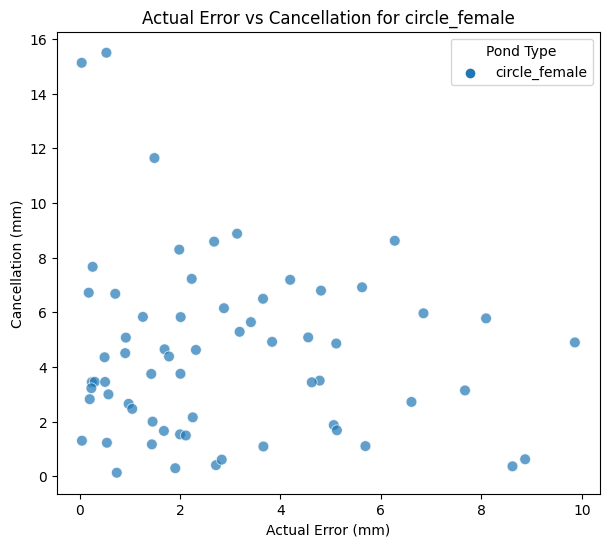


--- Error Analysis for Pond Type: circle_male ---
   - Number of points in df_pond: 13
1. Partial Cancellation of Errors:
   - Percentage of points with partial cancellation: 100.00%
   - Number of points with partial cancellation: 13

2. Cancellation Magnitude:
   - Mean cancellation magnitude: 6.37
   - Standard deviation of cancellation magnitude: 1.99
   - Mean percentage of cancellation magnitude relative to Length_fov(mm): 28.50%
   - Standard deviation of relative cancellation magnitude: 8.91%

----------------------------------------

Correlation between actual error and cancellation: -0.426111911631618


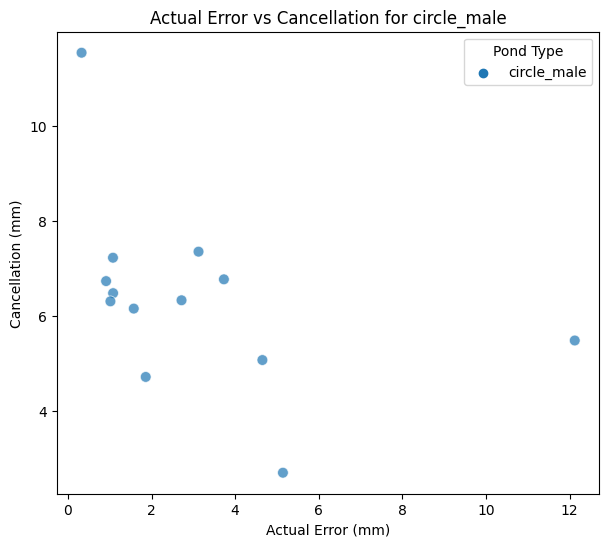


--- Error Analysis for Pond Type: square ---
   - Number of points in df_pond: 32
1. Partial Cancellation of Errors:
   - Percentage of points with partial cancellation: 40.62%
   - Number of points with partial cancellation: 13

2. Cancellation Magnitude:
   - Mean cancellation magnitude: 4.59
   - Standard deviation of cancellation magnitude: 2.94
   - Mean percentage of cancellation magnitude relative to Length_fov(mm): 15.63%
   - Standard deviation of relative cancellation magnitude: 10.02%

----------------------------------------

Correlation between actual error and cancellation: 0.25475539906390093


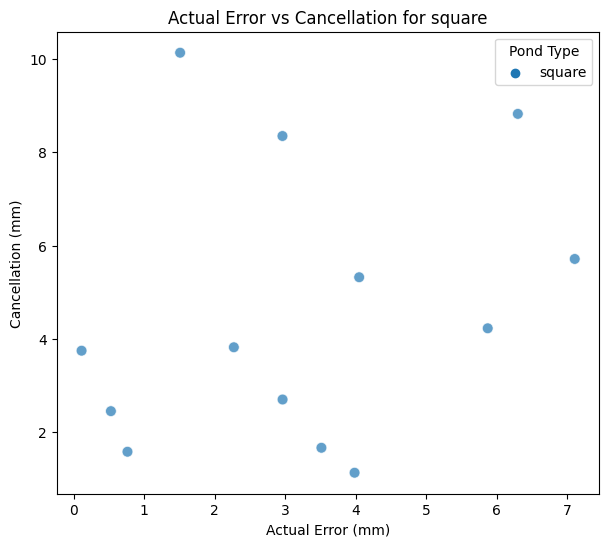

In [21]:
for pond_type in df['Pond_Type'].unique():
    df_pond = df[df['Pond_Type'] == pond_type]

    df_pond['pixel_error_mm'] = (df_pond['mean_pixels'] - df_pond['pred_Distance_pixels']) * (1/df_pond['mean_scale']) * 10
    df_pond['scale_error_mm'] = df_pond['mean_pixels'] * (1/df_pond['mean_scale'] - 1/df_pond['pred_scale']) * 10
    partial_cancel_mask_all = (df_pond['pixel_error_mm'] * df_pond['scale_error_mm'] < 0)
    percent_partial_cancel_all = 100 * partial_cancel_mask_all.sum() / len(df_pond) if len(df_pond) > 0 else 0
    print("\n--- Error Analysis for Pond Type: {} ---".format(pond_type))
    #print number of points in df_pond
    print("   - Number of points in df_pond: {}".format(len(df_pond)))
    print("1. Partial Cancellation of Errors:")
    print("   - Percentage of points with partial cancellation: {:.2f}%".format(percent_partial_cancel_all))
    num_partial_cancel_all = partial_cancel_mask_all.sum()
    print("   - Number of points with partial cancellation: {}".format(num_partial_cancel_all))
    
    uncancelled_error = abs(df_pond[partial_cancel_mask_all]['pixel_error_mm']) + abs(df_pond[partial_cancel_mask_all]['scale_error_mm'])
    actual_total_error = abs(df_pond[partial_cancel_mask_all]['pixel_error_mm'] + df_pond[partial_cancel_mask_all]['scale_error_mm'])
    cancellation_magnitude = uncancelled_error - actual_total_error
    
    print("\n2. Cancellation Magnitude:")
    print("   - Mean cancellation magnitude: {:.2f}".format(cancellation_magnitude.mean()))
    print("   - Standard deviation of cancellation magnitude: {:.2f}".format(cancellation_magnitude.std()))
    print("   - Mean percentage of cancellation magnitude relative to Length_fov(mm): {:.2f}%".format(
        cancellation_magnitude.mean() / df_pond["Length_fov(mm)"].abs().mean() * 100))
    print("   - Standard deviation of relative cancellation magnitude: {:.2f}%".format(cancellation_magnitude.std() / df_pond["Length_fov(mm)"].abs().mean() * 100))
  
    print("\n----------------------------------------\n")

    df_pond['actual_error_mm'] = abs(df_pond[partial_cancel_mask_all]['pixel_error_mm'] + df_pond[partial_cancel_mask_all]['scale_error_mm'])
    df_pond['cancellation_mm'] = abs(df_pond[partial_cancel_mask_all]['pixel_error_mm']) + abs(df_pond[partial_cancel_mask_all]['scale_error_mm']) - df_pond[partial_cancel_mask_all]['actual_error_mm']

    #correlation between actual error and cancellation
    print(f"Correlation between actual error and cancellation: {df_pond['actual_error_mm'].corr(df_pond['cancellation_mm'])}")

    #scatter plot of actual error vs cancellation
    plt.figure(figsize=(7, 6))
    sns.scatterplot(data=df_pond, x='actual_error_mm', y='cancellation_mm',
                hue='Pond_Type', alpha=.7, s=60)
    plt.xlabel('Actual Error (mm)')
    plt.ylabel('Cancellation (mm)')
    plt.title(f'Actual Error vs Cancellation for {pond_type}')
    plt.legend(title='Pond Type')
    plt.show()



### scale error ###

In [20]:
for pond_type in df['Pond_Type'].unique():
    df_pond = df[df['Pond_Type'] == pond_type]
    df_pond['pixel_error_mm'] = (df_pond['mean_pixels'] - df_pond['pred_Distance_pixels']) * (1/df_pond['mean_scale']) * 10
    df_pond['scale_error_mm'] = df_pond['mean_pixels'] * (1/df_pond['mean_scale'] - 1/df_pond['pred_scale']) * 10

    # Magnitude of scale error
    df_pond['scale_error_mm'] = abs(df_pond['scale_error_mm'])
    
    # Mean and standard deviation of scale error
    mean_scale_error = df_pond['scale_error_mm'].mean()
    std_scale_error = df_pond['scale_error_mm'].std()
    print(f"\n--- Scale Error Analysis for Pond Type: {pond_type} ---")
    print(f"   - Mean of Scale Error: {mean_scale_error:.2f} mm")
    print(f"   - Standard Deviation of Scale Error: {std_scale_error:.2f} mm")
    
    # Mean and standard deviation relative to scale error
    mean_relative_scale_error = (mean_scale_error / df_pond['Length_fov(mm)']).abs().mean()*100
    std_relative_scale_error = (std_scale_error / df_pond['Length_fov(mm)']).abs().mean()*100   
    print(f"   - Mean of Scale Error Relative to Length: {mean_relative_scale_error:.2f}%")
    print(f"   - Standard Deviation of Scale Error Relative to Length: {std_relative_scale_error:.2f}%")
    print("\n----------------------------------------\n")


    #shared scale error in the same image
    df_pond['scale_error_percentage'] = (df_pond['scale_error_mm'] / df_pond['Length_fov(mm)']) * 100
    shared_label_count = df_pond[df_pond['scale_error_percentage'] > 10]['Label'].duplicated(keep=False).sum()
    percent_shared = 100 * shared_label_count / len(df_pond)
    print(f"Percentage of scale error points that share the same image (Label) with at least one other scale error point (all samples): {percent_shared:.4f}%")
    print(f"Number of scale error points that share the same image (Label) with at least one other scale error point (all samples): {shared_label_count}")
    print(f"Total number of images with scale error: with shared label: {df_pond[df_pond['scale_error_percentage'] > 5]['Label'].nunique()}")
    print("\n----------------------------------------\n")







--- Scale Error Analysis for Pond Type: circle_female ---
   - Mean of Scale Error: 2.14 mm
   - Standard Deviation of Scale Error: 1.58 mm
   - Mean of Scale Error Relative to Length: 6.83%
   - Standard Deviation of Scale Error Relative to Length: 5.05%

----------------------------------------


--- Scale Error Analysis for Pond Type: circle_male ---
   - Mean of Scale Error: 3.77 mm
   - Standard Deviation of Scale Error: 1.29 mm
   - Mean of Scale Error Relative to Length: 19.99%
   - Standard Deviation of Scale Error Relative to Length: 6.83%

----------------------------------------


--- Scale Error Analysis for Pond Type: square ---
   - Mean of Scale Error: 2.96 mm
   - Standard Deviation of Scale Error: 2.10 mm
   - Mean of Scale Error Relative to Length: 10.30%
   - Standard Deviation of Scale Error Relative to Length: 7.31%

----------------------------------------

